In [1]:
# connect drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Ai_intern/Task_3


/content/drive/MyDrive/Ai_intern/Task_3


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
base_dir = '/content/drive/MyDrive/Ai_intern/Task_3/COVID-19_Radiography_Dataset'
covid_dir = os.path.join(base_dir, 'COVID/images')
normal_dir = os.path.join(base_dir, 'Normal/images')
pneumonia_dir = os.path.join(base_dir, 'Viral Pneumonia/images')


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # 20% for validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 8080 images belonging to 3 classes.
Found 2019 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: COVID, Normal, Pneumonia
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 658s 3s/step - accuracy: 0.7901 - loss: 0.4766 - val_accuracy: 0.8547 - val_loss: 0.3887
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 293us/step - accuracy: 0.8438 - loss: 0.3830 - val_accuracy: 1.0000 - val_loss: 0.0563
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 647s 3s/step - accuracy: 0.8215 - loss: 0.4229 - val_accuracy: 0.8666 - val_loss: 0.3362
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 286us/step - accuracy: 0.9062 - loss: 0.3493 - val_accuracy: 0.6667 - val_loss: 0.2848
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 650s 3s/step - accuracy: 0.8398 - loss: 0.3796 - val_accuracy: 0.8755 - val_loss: 0.3382
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.8750 - loss: 0.4376 - val_accuracy: 1.0000 - val_loss: 0.1880
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 649s 3s/step - accuracy: 0.8482 - loss: 0.3666 - val_accuracy: 0.8735 - val_loss: 0.3421
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step - accuracy: 0.8750 - loss: 0.5163 - val_

In [9]:
# prompt: resume above training from 15th epoch

# Load the saved model weights
model.load_weights('/content/drive/MyDrive/Ai_intern/Task_3/COVID-19_Radiography_Dataset/covid_classification_model.h5')  # Replace with your weights file path

# Resume training from the 15th epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,  # Train for a total of 20 epochs, resuming from the 15th
    initial_epoch=15  # Start training from the 15th epoch
)


Epoch 16/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


252/252 ━━━━━━━━━━━━━━━━━━━━ 4572s 18s/step - accuracy: 0.9118 - loss: 0.2271 - val_accuracy: 0.8978 - val_loss: 0.2868
Epoch 17/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 498us/step - accuracy: 0.9375 - loss: 0.1181 - val_accuracy: 1.0000 - val_loss: 0.0210
Epoch 18/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


252/252 ━━━━━━━━━━━━━━━━━━━━ 633s 2s/step - accuracy: 0.9227 - loss: 0.2060 - val_accuracy: 0.9053 - val_loss: 0.2629
Epoch 19/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 29s 109ms/step - accuracy: 0.8750 - loss: 0.2941 - val_accuracy: 1.0000 - val_loss: 0.1148
Epoch 20/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 654s 2s/step - accuracy: 0.9219 - loss: 0.1989 - val_accuracy: 0.9206 - val_loss: 0.2451


In [11]:

# Save the model
model.save('/content/drive/MyDrive/Ai_intern/Task_3/COVID-19_Radiography_Dataset/covid_classification_modell.keras')


In [26]:
# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 845ms/step - accuracy: 0.9031 - loss: 0.2824
Validation Accuracy: 90.99%


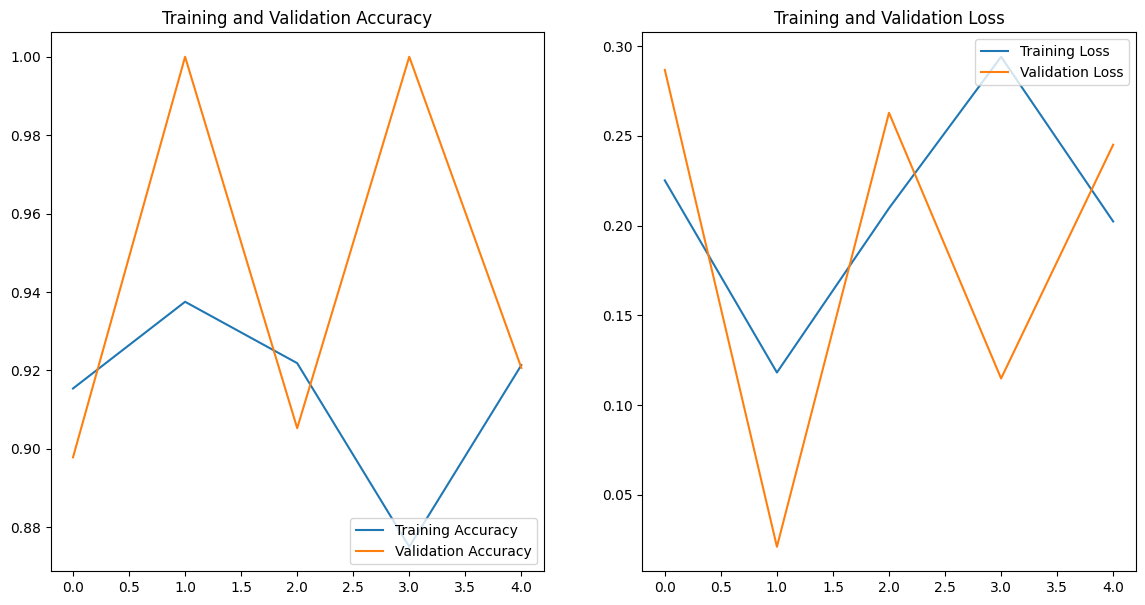

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


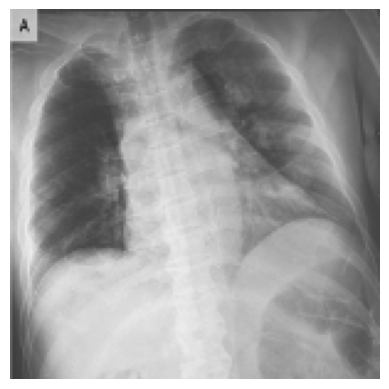

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predicted Class: COVID


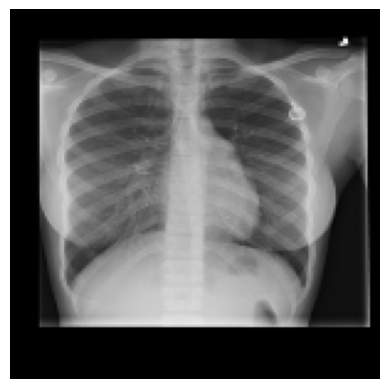

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class: Normal


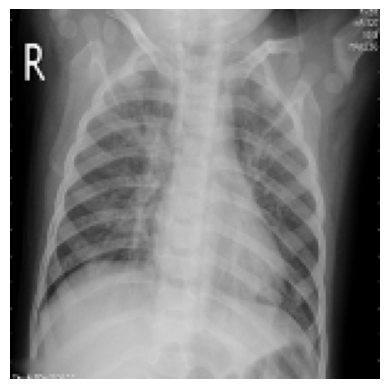

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class: Viral Pneumonia


In [19]:
# prompt: now apply model on 3 images i provide and also show image while predict

import matplotlib.pyplot as plt
import numpy as np

model = tf.keras.models.load_model('/content/drive/MyDrive/Ai_intern/Task_3/COVID-19_Radiography_Dataset/covid_classification_modell.keras')

img_paths = [
    '/content/drive/MyDrive/Ai_intern/Task_3/COVID-19_Radiography_Dataset/img1.png',
    '/content/drive/MyDrive/Ai_intern/Task_3/COVID-19_Radiography_Dataset/img2.png',
    '/content/drive/MyDrive/Ai_intern/Task_3/COVID-19_Radiography_Dataset/img3.png'
]

class_names = ['COVID', 'Normal', 'Viral Pneumonia']

for img_path in img_paths:
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    print(f'Predicted Class: {predicted_class}')
